In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
# Permite a exibição de gráficos do Matplotlib diretamente no Jupyter Notebook.
%matplotlib inline

In [3]:
df = pd.read_csv("Diabetes.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### Tratamento de dados

In [4]:
df = df.drop_duplicates()

In [5]:
nulos = df.isnull().sum()
nulos

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
# Calculando os limites para detecção de outliers usando o método do IQR (Intervalo Interquartil)
Q1_bmi = df['BMI'].quantile(0.25)
Q3_bmi = df['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# Definindo limites superior e inferior para detecção de outliers
limite_inferior_bmi = Q1_bmi - 1.5 * IQR_bmi
limite_superior_bmi = Q3_bmi + 1.5 * IQR_bmi

# Identificando outliers
outliers_bmi = df[(df['BMI'] < limite_inferior_bmi) | (df['BMI'] > limite_superior_bmi)]

# Removendo outliers
df = df[(df['BMI'] >= limite_inferior_bmi) & (df['BMI'] <= limite_superior_bmi)]

### Estatísticas descritivas

In [7]:
# Converter variáveis categóricas para o tipo 'category'
colunas_categoricas = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 
                       'Education', 'Income']

df[colunas_categoricas] = df[colunas_categoricas].astype('category')

In [8]:
df.describe()

,BMI,MentHlth,PhysHlth
count,224143.000000,224143.000000,224143.000000
mean,28.077214,3.428793,4.557300
std,5.410090,7.622956,8.937287
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,4.000000
max,44.000000,30.000000,30.000000


In [9]:
df.describe()

,BMI,MentHlth,PhysHlth
count,224143.000000,224143.000000,224143.000000
mean,28.077214,3.428793,4.557300
std,5.410090,7.622956,8.937287
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,4.000000
max,44.000000,30.000000,30.000000


In [10]:
df[colunas_categoricas].describe()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
count,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0,224143.0
unique,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,13.0,6.0,8.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0
freq,186589.0,123379.0,125341.0,214986.0,119589.0,214149.0,201113.0,165514.0,137848.0,178406.0,210355.0,212145.0,203683.0,76613.0,184271.0,125031.0,28947.0,86816.0,70753.0


### Gráficos 

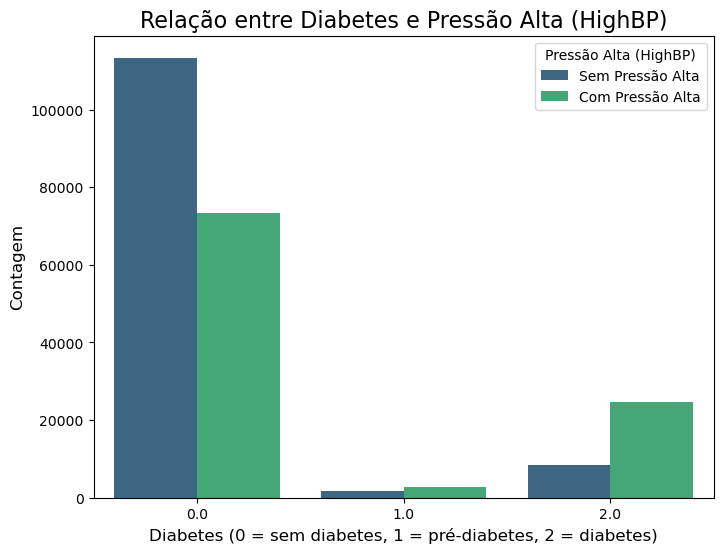

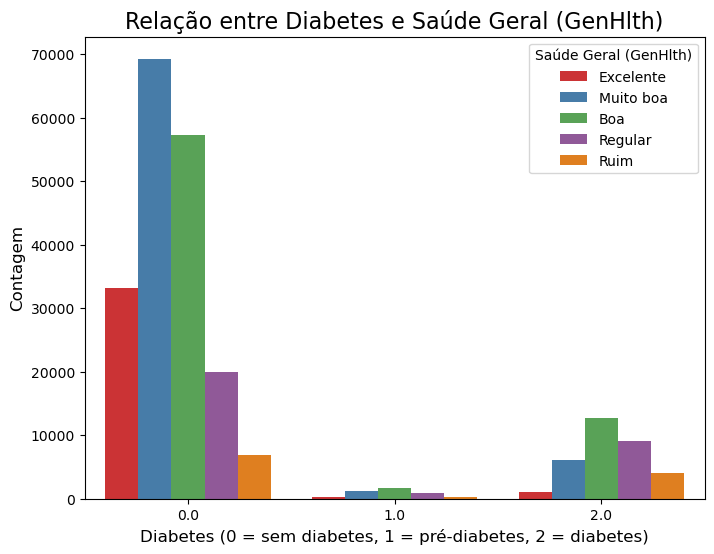

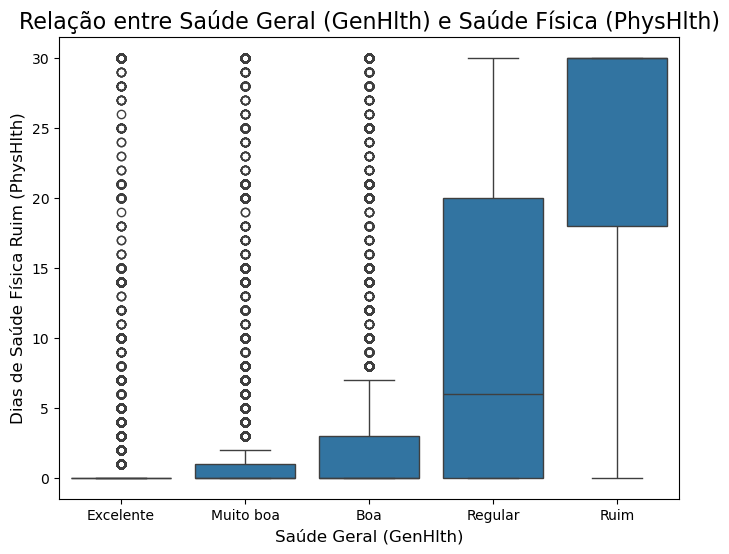

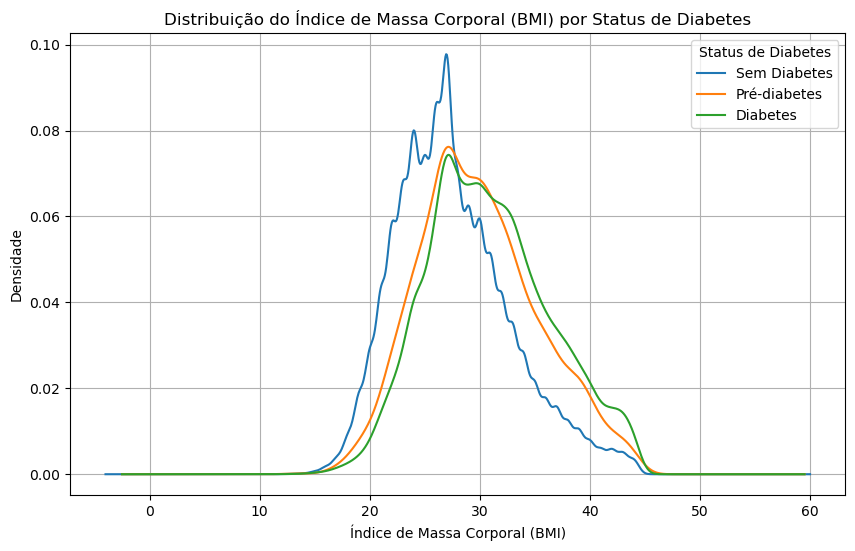

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='Diabetes_012', hue='HighBP', data=df, palette="viridis")

plt.title('Relação entre Diabetes e Pressão Alta (HighBP)', fontsize=16)
plt.xlabel('Diabetes (0 = sem diabetes, 1 = pré-diabetes, 2 = diabetes)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Pressão Alta (HighBP)', loc='upper right', labels=['Sem Pressão Alta', 'Com Pressão Alta'])
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='Diabetes_012', hue='GenHlth', data=df, palette="Set1")

plt.title('Relação entre Diabetes e Saúde Geral (GenHlth)', fontsize=16)
plt.xlabel('Diabetes (0 = sem diabetes, 1 = pré-diabetes, 2 = diabetes)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Saúde Geral (GenHlth)', loc='upper right', labels=['Excelente', 'Muito boa', 'Boa', 'Regular', 'Ruim'])
plt.show()

# Plotting the correlation between GenHlth and PhysHlth
plt.figure(figsize=(8,6))
sns.boxplot(x='GenHlth', y='PhysHlth', data=df)

plt.title('Relação entre Saúde Geral (GenHlth) e Saúde Física (PhysHlth)', fontsize=16)
plt.xlabel('Saúde Geral (GenHlth)', fontsize=12)
plt.ylabel('Dias de Saúde Física Ruim (PhysHlth)', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Excelente', 'Muito boa', 'Boa', 'Regular', 'Ruim'])
plt.show()

# Filtrar os dados para remover NaNs da coluna Diabetes_012 e BMI
data_filtered = df[['Diabetes_012', 'BMI']].dropna()

# Definir os labels para as diferentes categorias de Diabetes_012
diabetes_labels = {0: 'Sem Diabetes', 1: 'Pré-diabetes', 2: 'Diabetes'}

# Mapeando os valores para facilitar a legenda
data_filtered['Diabetes_012'] = data_filtered['Diabetes_012'].map(diabetes_labels)

# Criar o gráfico de densidade
plt.figure(figsize=(10, 6))
for status in diabetes_labels.values():
    subset = data_filtered[data_filtered['Diabetes_012'] == status]
    subset['BMI'].plot(kind='kde', label=status)

plt.title('Distribuição do Índice de Massa Corporal (BMI) por Status de Diabetes')
plt.xlabel('Índice de Massa Corporal (BMI)')
plt.ylabel('Densidade')
plt.legend(title='Status de Diabetes')
plt.grid(True)
plt.show()

### Matriz de Correlação

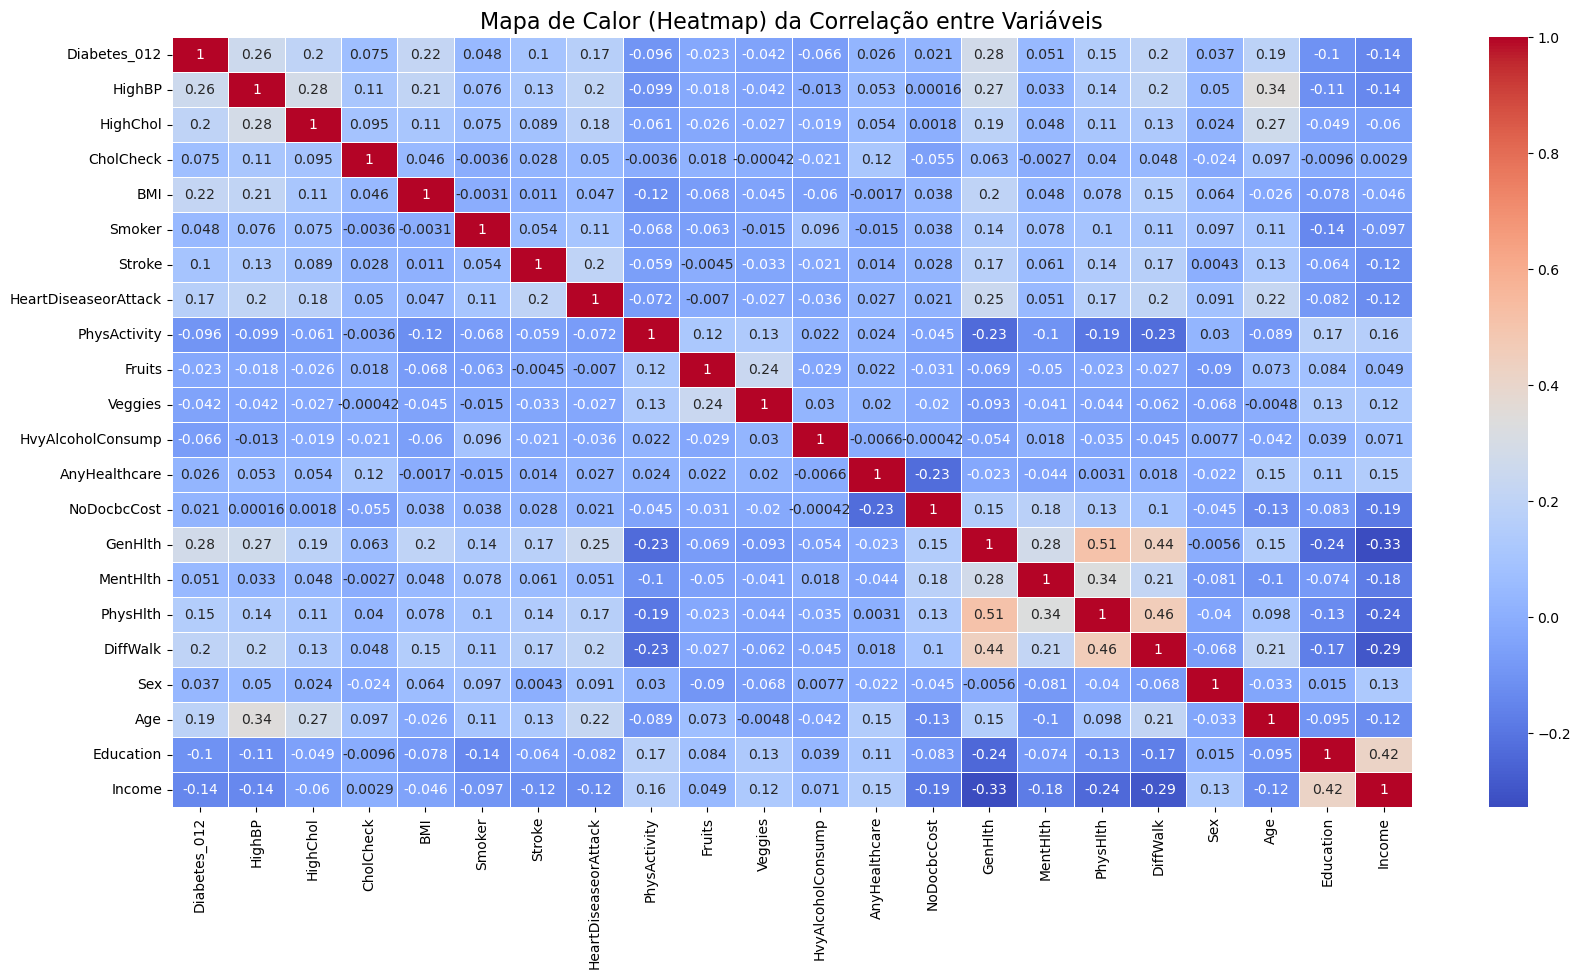

In [12]:
# Criando uma matriz de correlação entre as variáveis numéricas do conjunto de dados
correlation_matrix = df.corr()

# Configuração do tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criando o heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Adicionando título ao gráfico
plt.title('Mapa de Calor (Heatmap) da Correlação entre Variáveis', fontsize=16)

# Exibindo o gráfico
plt.show()

#### Correlações de destaque:

GenHlth x PhysHlth - 0.51 <br>
PhysHlth x  DiffWalk - 0.46 <br>
Education x Income - 0.42 <br>
GenHlth x DiffWalk - 0.44 <br>
PhysHlth x MentHlth - 0.34 <br>
Age x HighBP - 0.34 <br>
Diabetes_012 x HighBP - 0.26 <br>
Diabetes_012 x GenHlth - 0.28 <br>

## Teste de Hipótese

### Teste 1: Associação entre Diabetes e Pressão Alta (HighBP)

**teste qui-quadrado de independência** para verificar se há uma associação significativa entre o status de diabetes (sem diabetes, pré-diabetes, diabetes) e a presença de pressão alta (HighBP). As hipóteses foram:

- **\(H_0\)**: Não há relação significativa entre ter diabetes (ou pré-diabetes) e ter pressão alta. Ou seja, a proporção de indivíduos com pressão alta é a mesma para pessoas com e sem diabetes.
- **\(H_1\)**: Há uma relação significativa entre ter diabetes (ou pré-diabetes) e ter pressão alta. Ou seja, a proporção de indivíduos com pressão alta difere entre pessoas com e sem diabetes.

In [13]:
# Criar a tabela de contingência entre Diabetes_012 e HighBP
contingency_table = pd.crosstab(df['Diabetes_012'], df['HighBP'])

# Diabetes_012 x HighBP (qui-quadrado de independência)
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Exibir os resultados do teste
print(f"Tabela de contingência (observada): {contingency_table}")
print(f"\nEstatística chi-quadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_val:.10f}")
print(f"Graus de liberdade: {dof}")
print(f"\nFrequências esperadas na tabela de contingência:\n{expected}\n")

# Determinando o resultado
alpha = 0.05  # Nível de significância de 5%
if p_val < alpha:
    print("Rejeitamos a hipótese nula (H₀). Há uma associação significativa entre Diabetes e Pressão Alta.")
else:
    print("Não rejeitamos a hipótese nula (H₀). Não há associação significativa entre Diabetes e Pressão Alta.")


Tabela de contingência (observada): HighBP           0.0    1.0
Diabetes_012               
0.0           113347  73242
1.0             1666   2787
2.0             8366  24735

Estatística chi-quadrado: 14866.6111
Valor p: 0.0000000000
Graus de liberdade: 2

Frequências esperadas na tabela de contingência:
[[102707.48687668  83881.51312332]
 [  2451.14363152   2001.85636848]
 [ 18220.3694918   14880.6305082 ]]

Rejeitamos a hipótese nula (H₀). Há uma associação significativa entre Diabetes e Pressão Alta.


O teste resultou em uma estatística qui-quadrado de **14.866,61** e um **p-valor < 0.00001**. Isso indica uma forte evidência para rejeitar a hipótese nula, sugerindo que há uma associação significativa entre as duas variáveis.

### Teste 2: Associação entre Diabetes e Saúde Geral (GenHlth)

Para realizar um teste de hipótese entre as variáveis **Diabetes_012** (status de diabetes) e **GenHlth** (avaliação geral de saúde em uma escala de 1 a 5, onde 1 = excelente e 5 = ruim), podemos aplicar novamente o **teste qui-quadrado de independência**, já que ambas as variáveis são categóricas.

- **Hipótese nula (\(H_0\))**: Não há associação entre o status de diabetes e a avaliação geral de saúde (GenHlth).
- **Hipótese alternativa (\(H_1\))**: Existe uma associação entre o status de diabetes e a avaliação geral de saúde.

In [14]:
# Criar a tabela de contingência entre Diabetes_012 e GenHlth
contingency_table_genhlth = pd.crosstab(df['Diabetes_012'], df['GenHlth'])

# Diabetes_012 x GenHlth (qui-quadrado de independência)
chi2_stat_genhlth, p_val_genhlth, dof_genhlth, expected_genhlth = chi2_contingency(contingency_table_genhlth)

# Exibir os resultados do teste
print(f"Tabela de contingência (observada): {contingency_table_genhlth}")
print(f"\nEstatística chi-quadrado: {chi2_stat_genhlth:.4f}")
print(f"Valor p: {p_val_genhlth:.10f}")
print(f"Graus de liberdade: {dof_genhlth}")
print(f"\nFrequências esperadas na tabela de contingência:\n{expected_genhlth}\n")

# Determinando o resultado
if p_val_genhlth < alpha:
    print("Rejeitamos a hipótese nula (H₀). Há uma associação significativa entre Diabetes e Saúde Geral.")
else:
    print("Não rejeitamos a hipótese nula (H₀). Não há associação significativa entre Diabetes e Saúde Geral.")

Tabela de contingência (observada): GenHlth         1.0    2.0    3.0    4.0   5.0
Diabetes_012                                  
0.0           33250  69268  57303  19913  6855
1.0             309   1188   1667    962   327
2.0            1113   6157  12702   9016  4113

Estatística chi-quadrado: 17806.9481
Valor p: 0.0000000000
Graus de liberdade: 8

Frequências esperadas na tabela de contingência:
[[28862.88578274 63776.88822314 59663.72720986 24882.91759725
   9402.58118701]
 [  688.82104728  1522.05372909  1423.89196183   593.83796505
    224.39529675]
 [ 5120.29316999 11314.05804776 10584.38082831  4414.2444377
   1668.02351624]]

Rejeitamos a hipótese nula (H₀). Há uma associação significativa entre Diabetes e Saúde Geral.


O p-valor é muito menor que o nível de significância (\(\alpha = 0.05\)), e portanto, **rejeitamos a hipótese nula (H₀)**. Isso sugere uma associação significativa entre o status de diabetes e a avaliação geral da saúde.